In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
%store -r dataset

In [3]:
dataset_processed = dataset.copy()
dataset_processed

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Day,Month
0,2,10000,1100,Ground out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,18,5
1,2,20000,800,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,13,5
2,2,17000,1000,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,16,5
3,2,10000,800,1 out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,4,7
4,2,7500,850,1 out of 2,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,3 out of 5,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,18,5
4742,3,29000,2000,1 out of 4,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,15,5
4743,3,35000,1750,3 out of 5,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,10,7
4744,3,45000,1500,23 out of 34,Carpet Area,Hyderabad,Semi-Furnished,Family,2,Contact Agent,6,7


# Outlier Treatment
There may exists an outlier in a dataset. For that, using interquartile range removing the outlier. The condition that must meet is, the datapoint must exists between
* lower_range = Q1 - 1.5 * inter_quartile_range
* higher_range = Q3 + 1.5 * inter_quartile_range

In [4]:
def remove_outlier(dataset: pd.DataFrame, column: str, strategy: str="mean") -> pd.DataFrame:
    column_data = dataset[column]

    # Calculation of quartiles
    Q1 = dataset[column].quantile(0.25)
    Q2 = dataset[column].quantile(0.5)
    Q3 = dataset[column].quantile(0.75)
    mean = dataset[column].mean()

    #inter quartile range
    iqr = Q3 - Q1

    # Calculation of lower and upper limit
    lower_limit = Q1 - 1.5 * iqr
    upper_limit = Q3 + 1.5 * iqr

    # Detecting outliers
    outliers = dataset.loc[(column_data < lower_limit) | (column_data > upper_limit), column]
    outliers_density = len(outliers)/len(dataset)

    # Replacing the outlier with data wrt strategy mentioned
    if strategy == "median":
        dataset.loc[(column_data < lower_limit)|(column_data > upper_limit), column] = Q2
        
    elif strategy == "mean":
        dataset.loc[(column_data < lower_limit)|(column_data > upper_limit), column] = mean


    #plotting the plot with and without outliers
    def outlier_detection_plot():
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

        # Box Plot
        # for box plot with outliers
        sns.boxplot(y=column_data, ax=ax1, color="red")
        ax1.set_title(column + '  '+ "Boxplot with Outliers")
        ax1.set_xlabel("Boxplot")
        ax1.set_ylabel("Values")

        # for box plot without outliers
        sns.boxplot(y=dataset[column], ax=ax2, color="green")
        ax2.set_title(column + '  ' + "Boxplot without Outliers")
        ax2.set_xlabel("Boxplot")
        ax2.set_ylabel("Values")

        # Histogram plot
        # for histogram with outliers
        sns.histplot(column_data, ax=ax3, color="red", kde=True)
        ax3.set_title(column + '  ' + "Histogram without Outliers")
        ax3.set_xlabel("Histogram")
        ax3.set_ylabel("Values")

        # for histogram without outliers
        sns.histplot(dataset[column], ax=ax4, color="blue", kde=True)
        ax4.set_title(column + '  ' + "Histogram with Outliers")
        ax4.set_xlabel("Histogram")
        ax4.set_ylabel("Values")

        plt.subplots_adjust(hspace=0.3)
        plt.show()
    
    outlier_detection_plot()
    
    return (dataset, outliers_density)

In [5]:
dataset_processed.select_dtypes(include=np.number).columns.to_list()

['BHK', 'Rent', 'Size', 'Bathroom', 'Day', 'Month']

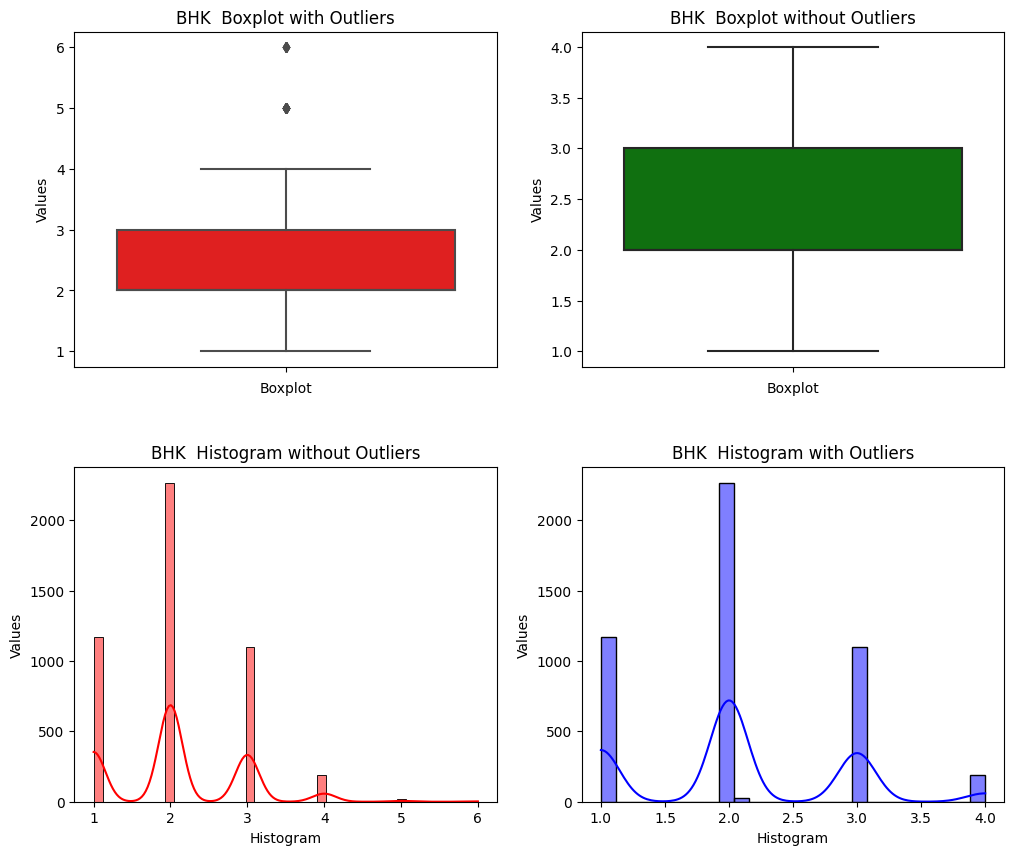

Outlier density: 0.005689001264222503


In [6]:
# Outliers Treatment ofr BHK
(dataset_processed, outlier_density) = remove_outlier(dataset=dataset_processed, column="BHK")
print(f"Outlier density: {outlier_density}")

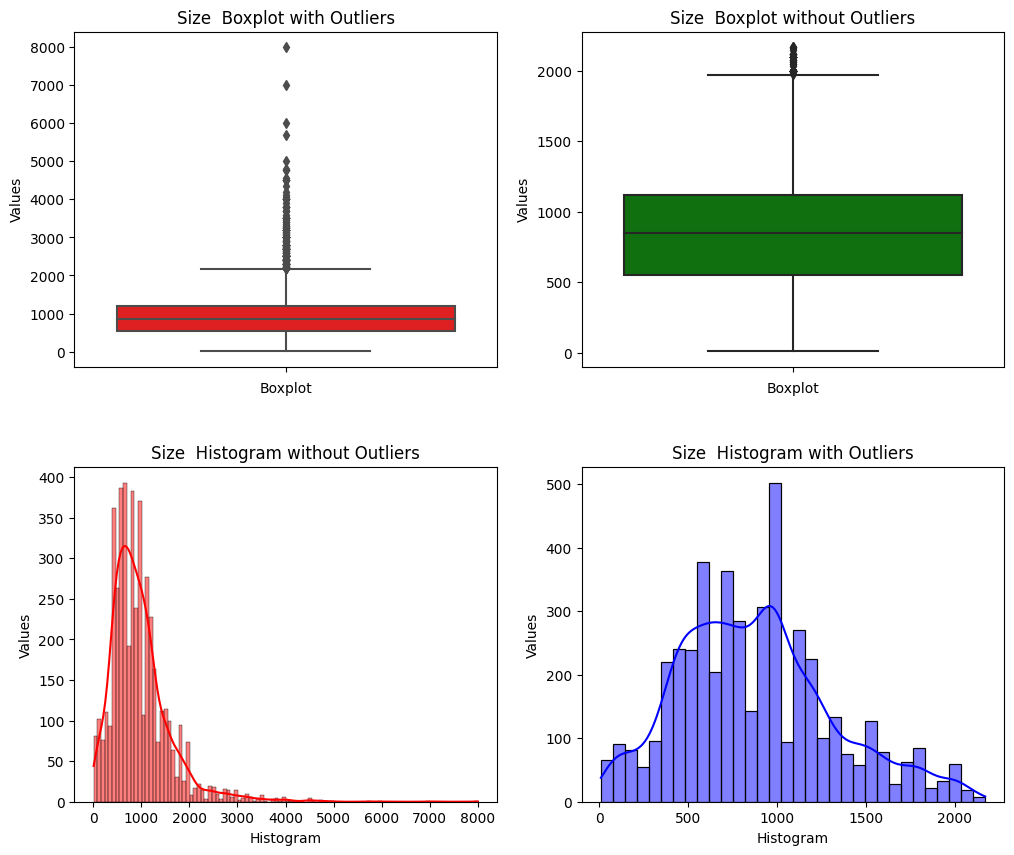

Outlier density: 0.04277286135693215


In [7]:
# Outlier Treatment for Size
(dataset_processed, outlier_density) = remove_outlier(dataset=dataset_processed, column="Size")
print(f"Outlier density: {outlier_density}")

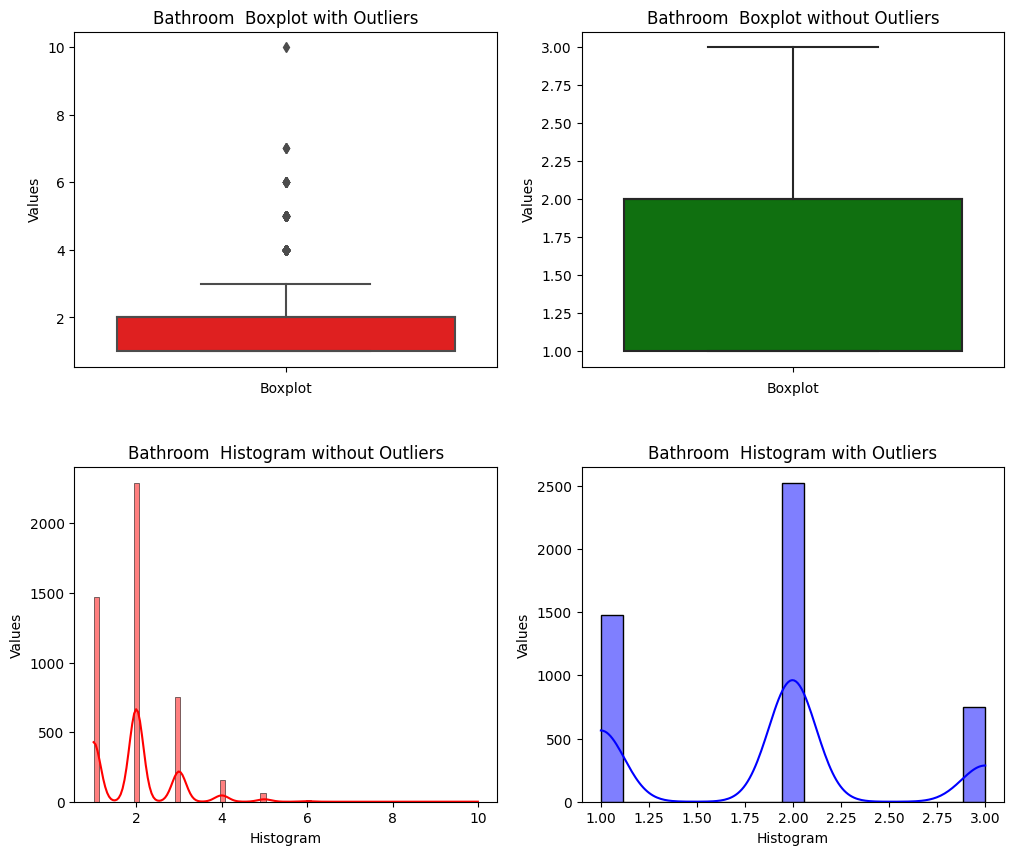

Outlier density: 0.048883270122208174


In [8]:
# Outlier Treatment for Bathroom
(dataset_processed, outlier_density) = remove_outlier(dataset=dataset_processed, column="Bathroom")
print(f"Outlier density: {outlier_density}")

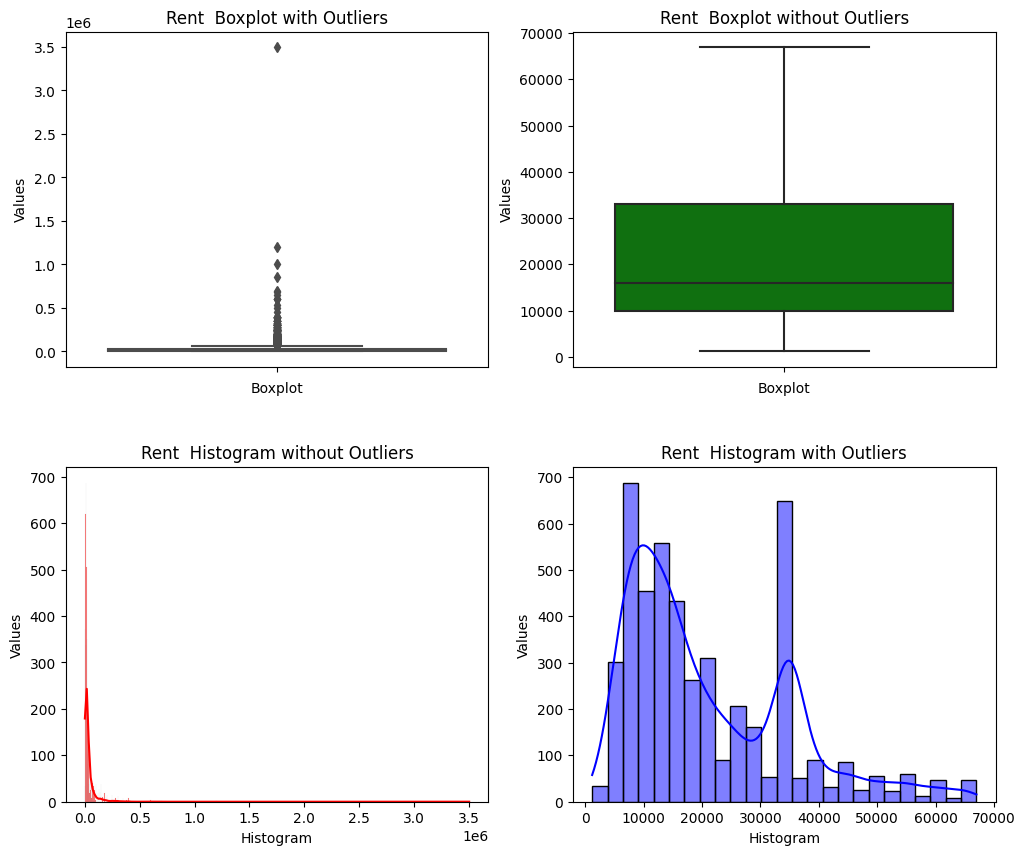

Outlier density: 0.10956595027391487


In [9]:
# Outlier Treatment for Rent
(dataset_processed, outlier_density) = remove_outlier(dataset=dataset_processed, column="Rent")
print(f"Outlier density: {outlier_density}")

In [10]:
dataset_processed.head()

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Day,Month
0,2.0,10000.0,1100.0,Ground out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,2.0,Contact Owner,18,5
1,2.0,20000.0,800.0,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner,13,5
2,2.0,17000.0,1000.0,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner,16,5
3,2.0,10000.0,800.0,1 out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,1.0,Contact Owner,4,7
4,2.0,7500.0,850.0,1 out of 2,Carpet Area,Kolkata,Unfurnished,Bachelors,1.0,Contact Owner,9,5


In [11]:
# Splitting the Floor into different category
dataset_processed['Floor'] = dataset_processed['Floor'].str[0]
dataset_processed

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Day,Month
0,2.0,10000.0,1100.0,G,Super Area,Kolkata,Unfurnished,Bachelors/Family,2.0,Contact Owner,18,5
1,2.0,20000.0,800.0,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner,13,5
2,2.0,17000.0,1000.0,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner,16,5
3,2.0,10000.0,800.0,1,Super Area,Kolkata,Unfurnished,Bachelors/Family,1.0,Contact Owner,4,7
4,2.0,7500.0,850.0,1,Carpet Area,Kolkata,Unfurnished,Bachelors,1.0,Contact Owner,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2.0,15000.0,1000.0,3,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2.0,Contact Owner,18,5
4742,3.0,29000.0,2000.0,1,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3.0,Contact Owner,15,5
4743,3.0,35000.0,1750.0,3,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3.0,Contact Agent,10,7
4744,3.0,45000.0,1500.0,2,Carpet Area,Hyderabad,Semi-Furnished,Family,2.0,Contact Agent,6,7


In [12]:
# Encoding the floor
floor_encode = {
    'L':-1,'G':0,"U":0,'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9
}

dataset_processed['Floor']=dataset_processed['Floor'].map(floor_encode)

In [13]:
# Checking for unique value of floor
print("Unique values:")
print(dataset_processed["Floor"].unique())
print("Number of unique values: {}".format(dataset_processed["Floor"].nunique()))

Unique values:
[ 0  1  2  4  3  5  7  8 -1  6  9]
Number of unique values: 11


In [14]:
dataset_processed.head(15)

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Day,Month
0,2.0,10000.0,1100.0,0,Super Area,Kolkata,Unfurnished,Bachelors/Family,2.0,Contact Owner,18,5
1,2.0,20000.0,800.0,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner,13,5
2,2.0,17000.0,1000.0,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner,16,5
3,2.0,10000.0,800.0,1,Super Area,Kolkata,Unfurnished,Bachelors/Family,1.0,Contact Owner,4,7
4,2.0,7500.0,850.0,1,Carpet Area,Kolkata,Unfurnished,Bachelors,1.0,Contact Owner,9,5
5,2.0,7000.0,600.0,0,Super Area,Kolkata,Unfurnished,Bachelors/Family,2.0,Contact Owner,29,4
6,2.0,10000.0,700.0,0,Super Area,Kolkata,Unfurnished,Bachelors,2.0,Contact Agent,21,6
7,1.0,5000.0,250.0,1,Super Area,Kolkata,Unfurnished,Bachelors,1.0,Contact Agent,21,6
8,2.0,26000.0,800.0,1,Carpet Area,Kolkata,Unfurnished,Bachelors,2.0,Contact Agent,7,6
9,2.0,10000.0,1000.0,1,Carpet Area,Kolkata,Semi-Furnished,Bachelors/Family,2.0,Contact Owner,20,6


In [15]:
dataset_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BHK                4746 non-null   float64
 1   Rent               4746 non-null   float64
 2   Size               4746 non-null   float64
 3   Floor              4746 non-null   int64  
 4   Area Type          4746 non-null   object 
 5   City               4746 non-null   object 
 6   Furnishing Status  4746 non-null   object 
 7   Tenant Preferred   4746 non-null   object 
 8   Bathroom           4746 non-null   float64
 9   Point of Contact   4746 non-null   object 
 10  Day                4746 non-null   int32  
 11  Month              4746 non-null   int32  
dtypes: float64(4), int32(2), int64(1), object(5)
memory usage: 408.0+ KB


In [16]:
# This processed dataset is imported in model_preparation file
%store dataset_processed

Stored 'dataset_processed' (DataFrame)
